In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignment-9-heart/heart.csv


In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
#__________________________________________________________________________________
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [54]:
df=pd.read_csv("../input/assignment-9-heart/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

# Explanatory Data Analysis

In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [57]:
#check null value 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
# let's visualise the values of the discrete variables
numerical_discrete = []

for var in df:
    if len(df[var].unique())<10 and var not in ['target']:
        print(var, ' values: ', df[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))

sex  values:  [1 0]
cp  values:  [3 2 1 0]
fbs  values:  [1 0]
restecg  values:  [0 1 2]
exang  values:  [0 1]
slope  values:  [0 2 1]
ca  values:  [0 2 1 3 4]
thal  values:  [1 2 3 0]

There are 8 discrete variables


In [59]:
# find continuous variables
# let's remember to skip the target label variable charges, which is numerical

numerical_conts = [var for var in df if var not in numerical_discrete and var not in ['target']]
print(numerical_conts)
print('There are {} numerical_continuous variables'.format(len(numerical_conts)))

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
There are 5 numerical_continuous variables


In [130]:
numerical_continous=df[['age','trestbps','chol','thalach', 'oldpeak','target']]
numerical_continous.head()

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


In [61]:
#df1=numerical_conts

# Outliers in continous variables

<AxesSubplot:>

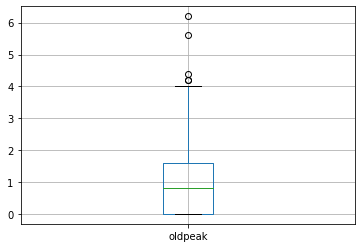

In [62]:
#sns.boxplot(df1.oldpeak)
numerical_continous.boxplot("oldpeak")
#numerical_continous.boxplot("chol")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='oldpeak'>

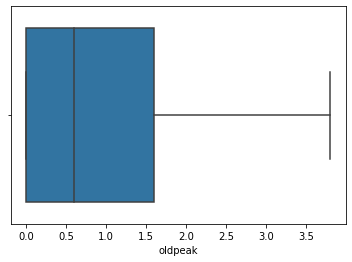

In [63]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(numerical_continous.oldpeak)

numerical_continous = numerical_continous.loc[(numerical_continous.oldpeak > lower) & (numerical_continous.oldpeak < upper)]

sns.boxplot(numerical_continous.oldpeak)


<AxesSubplot:>

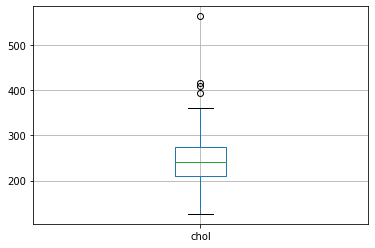

In [64]:
numerical_continous.boxplot("chol")


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='chol'>

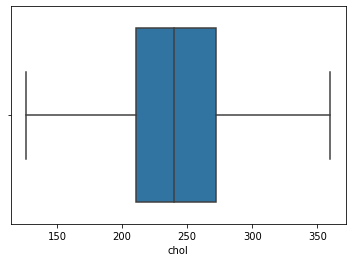

In [65]:
'''
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper
'''

lower, upper = remove_outlier(numerical_continous.chol)

numerical_continous= numerical_continous.loc[(numerical_continous.chol > lower) & (numerical_continous.chol < upper)]

sns.boxplot(numerical_continous.chol)
#df.boxplot("chol")

<AxesSubplot:>

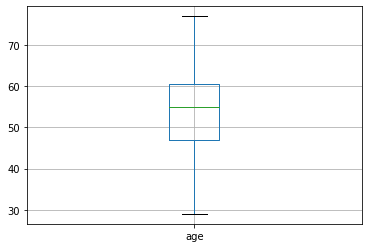

In [66]:
numerical_continous.boxplot("age")

<AxesSubplot:>

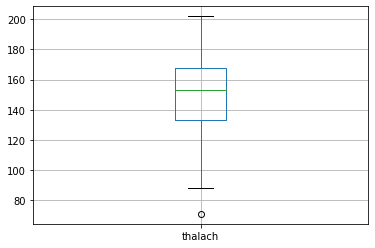

In [67]:
numerical_continous.boxplot("thalach")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thalach'>

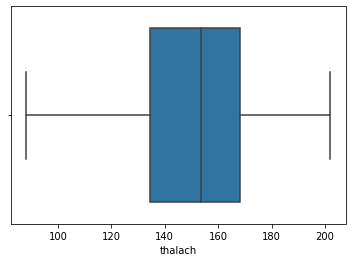

In [68]:
lower, upper = remove_outlier(numerical_continous.thalach)

numerical_continous = numerical_continous.loc[(numerical_continous.thalach > lower) & (numerical_continous.thalach < upper)]

sns.boxplot(numerical_continous.thalach)

<AxesSubplot:>

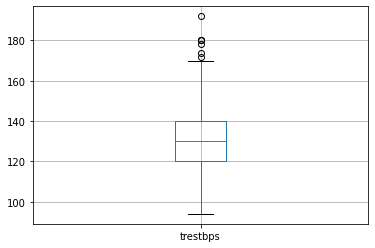

In [69]:
numerical_continous.boxplot("trestbps")


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trestbps'>

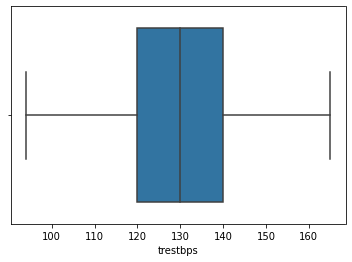

In [70]:
lower, upper = remove_outlier(numerical_continous.trestbps)

numerical_continous = numerical_continous.loc[(numerical_continous.trestbps > lower) & (numerical_continous.trestbps < upper)]

sns.boxplot(numerical_continous.trestbps)

In [131]:
numerical_continous.head()

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


# binning

In [72]:
#numer=numerical_continous.drop(columns=['oldpeak'])

In [73]:
# Remove column name 'oldpeak'
#numer=numerical_continous.drop('oldpeak')

In [74]:
pd.cut(numerical_continous['thalach'], bins=10)


0      (145.0, 156.4]
1      (179.2, 190.6]
2      (167.8, 179.2]
3      (167.8, 179.2]
4      (156.4, 167.8]
            ...      
298    (122.2, 133.6]
299    (122.2, 133.6]
300    (133.6, 145.0]
301    (110.8, 122.2]
302    (167.8, 179.2]
Name: thalach, Length: 279, dtype: category
Categories (10, interval[float64]): [(87.886, 99.4] < (99.4, 110.8] < (110.8, 122.2] < (122.2, 133.6] ... (156.4, 167.8] < (167.8, 179.2] < (179.2, 190.6] < (190.6, 202.0]]

In [75]:
pd.cut(numerical_continous['trestbps'], bins=20)

#sns.boxplot(df.trestbps)
#plt.plot(numerical_continous['trestbps1'], label='original')

0      (143.7, 147.25]
1      (129.5, 133.05]
2      (129.5, 133.05]
3      (118.85, 122.4]
4      (118.85, 122.4]
            ...       
298    (136.6, 140.15]
299    (108.2, 111.75]
300    (143.7, 147.25]
301    (129.5, 133.05]
302    (129.5, 133.05]
Name: trestbps, Length: 279, dtype: category
Categories (20, interval[float64]): [(93.929, 97.55] < (97.55, 101.1] < (101.1, 104.65] < (104.65, 108.2] ... (150.8, 154.35] < (154.35, 157.9] < (157.9, 161.45] < (161.45, 165.0]]

In [76]:
pd.cut(numerical_continous['age'], bins=20)


0      (62.6, 65.0]
1      (36.2, 38.6]
2      (38.6, 41.0]
3      (55.4, 57.8]
4      (55.4, 57.8]
           ...     
298    (55.4, 57.8]
299    (43.4, 45.8]
300    (67.4, 69.8]
301    (55.4, 57.8]
302    (55.4, 57.8]
Name: age, Length: 279, dtype: category
Categories (20, interval[float64]): [(28.952, 31.4] < (31.4, 33.8] < (33.8, 36.2] < (36.2, 38.6] ... (67.4, 69.8] < (69.8, 72.2] < (72.2, 74.6] < (74.6, 77.0]]

In [77]:
pd.cut(numerical_continous['chol'], bins=20)


0        (231.3, 243.0]
1        (243.0, 254.7]
2        (196.2, 207.9]
3        (231.3, 243.0]
4        (348.3, 360.0]
             ...       
298      (231.3, 243.0]
299      (254.7, 266.4]
300      (184.5, 196.2]
301    (125.766, 137.7]
302      (231.3, 243.0]
Name: chol, Length: 279, dtype: category
Categories (20, interval[float64]): [(125.766, 137.7] < (137.7, 149.4] < (149.4, 161.1] < (161.1, 172.8] ... (313.2, 324.9] < (324.9, 336.6] < (336.6, 348.3] < (348.3, 360.0]]

In [136]:
#we remove age because age is not continous
numerical_continous=numerical_continous.drop('age', axis =1)

# separating features

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["target"])
cor_target

In [ ]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

In [137]:
#separating target variable from features
# creating x(all feature columns except target)
X= numerical_continous.drop(columns=['target'])

# creating y (the output column)
y=numerical_continous['target']

In [ ]:
y

In [138]:
X

,trestbps,chol,thalach,oldpeak
0,145,233,150,2.3
1,130,250,187,3.5
2,130,204,172,1.4
3,120,236,178,0.8
4,120,354,163,0.6
...,...,...,...,...
298,140,241,123,0.2
299,110,264,132,1.2
300,144,193,141,3.4
301,130,131,115,1.2


CHECKING BALANCE

In [ ]:
y.value_counts()

In [ ]:
#installing imbalance
pip install imbalanced-learn

In [ ]:
import imblearn
print(imblearn.__version__)

In [88]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = [100, 10], centers=None, n_features=1, random_state = 4
                 )

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

#define model
model=DecisionTreeClassifier()
scores=cross_validate(model, X, y, cv=6, n_jobs = -1, scoring = "f1_macro")

In [142]:
scores

{'fit_time': array([0.00462461, 0.00389528, 0.0050261 , 0.00526214, 0.00528216,
        0.00540614]),
 'score_time': array([0.00284529, 0.00452709, 0.00429821, 0.00472879, 0.0028615 ,
        0.00419235]),
 'test_score': array([0.54622824, 0.58760108, 0.70542934, 0.57575758, 0.63534964,
        0.6124031 ])}

If you look at test_scores above it is so bad. Our data is imbalanced so we cannot work with our such data without balancing it first.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

# Oversampling 

In [144]:
# Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({0: 81, 1: 81})


In [145]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
oversample= SMOTE(random_state=42)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({0: 81, 1: 81})


# KNN_MODEL

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
print(accuracy_score(KNN_prediction, y_test))
#print(classification_report(KNN_prediction, y_test))

1.0


While analyzing the predicted output list, we see that the accuracy of the model is at 66%

# Support Vector Classifier

In [91]:
from sklearn.svm import SVC
#model_name="Kernel svm Classifier"
svmClassifier = SVC(kernel='rbf',gamma='auto')
#svm_model=Pipeline(steps=[('preprocessor',preprocessorForFeature),('classifier',svmClassifier)])
#svm
SVC_model=svmClassifier
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print(accuracy_score(SVC_prediction, y_test))

1.0


While analyzing the predicted output list, we see that the accuracy of the model is at 54%

# Logistic Regression Classifier

In [92]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionClassifier = LogisticRegression(random_state=0, multi_class = 'auto', solver='lbfgs',max_iter=1000)
#lrc_model=Pipeline(steps=[('preprocessor',preprocessorForCategoricalColumns),
                         #'classifier',LogisticRegressionClassifier])
lrc_model=LogisticRegressionClassifier
lrc_model.fit(X_train,y_train)
y_pred_lrc = lrc_model.predict(X_test)
print(accuracy_score(y_pred_lrc , y_test))

1.0


While analyzing the predicted output list, we see that the accuracy of the model is at 71%

# Naive Bayes

In [93]:
from sklearn.naive_bayes import MultinomialNB 
nbClassifier = MultinomialNB(alpha = 1.0, class_prior = None, fit_prior = True)
nb_model = nbClassifier
nb_model.fit(X_train, y_train)
y_pred_nb=nb_model.predict(X_test)
print(accuracy_score(y_pred_nb , y_test))

0.8636363636363636


While analyzing the predicted output list, we see that the accuracy of the model is at 71%

# GRID SEARCH

In [ ]:
# KNN neighbors Classifier Search for Algorithm Tuning
from sklearn.linear_model import Ridge
import numpy
from sklearn.model_selection import GridSearchCV
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
#alphas = numpy.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = dict(alpha=alphas)
model = KNeighborsClassifier(n_neighbors=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [ ]:
# Kernel svm Classifier Search for Algorithm Tuning
from sklearn.linear_model import Ridge
import numpy
from sklearn.model_selection import GridSearchCV
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = svmClassifier
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [ ]:
# Logistic Regression Classifier Search for Algorithm Tuning
from sklearn.linear_model import Ridge
import numpy
from sklearn.model_selection import GridSearchCV
alphas = numpy.array([100,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = LogisticRegressionClassifier
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [118]:
# NAIVE-BAYES Search for Algorithm Tuning
from sklearn.linear_model import Ridge
import numpy
from sklearn.model_selection import GridSearchCV
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = nbClassifier
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.909090909090909
1.0


/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [119]:
# Randomized for Algorithm Tuning
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha': uniform()}
model = nbClassifier
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
random_state=7)
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.909090909090909
0.07630828937395717


In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_train_score = cross_val_score(lgb_model, X_train, y_train, cv=5)
lgb_test_score = cross_val_score(lgb_model, X_test, y_test, cv=5)

print(round(lgb_train_score.mean(),2))
print(round(lgb_test_score.mean(),2))

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_train_score = cross_val_score(xgb_model, X_train, y_train, cv=5)
xgb_test_score = cross_val_score(xgb_model, X_test, y_test, cv=5)

print(round(xgb_train_score.mean(),2))
print(round(xgb_test_score.mean(),2))

In [ ]:
# Save Model Using Pickle
from pickle import dump
from pickle import load
# save the model to disk
filename = 'classification_model.sav'
dump(model, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

In [103]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.
